In [41]:
# We'll first import the necessary libraries for this project
# Pandas is required for to create and manipulate the dataframe
# PyPlot from MatPlotLib is needed for data visualization
# Numpy is needed for one instance of data clean-up

In [42]:
import pandas as pd

In [43]:
from matplotlib import pyplot as plt

In [44]:
import numpy as np

In [45]:
# Next we'll read in the necessary csv files for our project
# In this case we have 5 years worth of data for batters (excluding 2020 due to shortened season)
# The file only has players with a qualified number of plate appearances (502 over a 162 game season)
#    -This is to remove skewed statistcs based on small sample sizes

In [48]:
batters1 = pd.read_csv("B-2015.csv")
batters2 = pd.read_csv("B-2016.csv")
batters3 = pd.read_csv("B-2017.csv")
batters4 = pd.read_csv("B-2018.csv")
batters5 = pd.read_csv("B-2019.csv")

In [49]:
batters1.head()

Name          Team  Age  WAR    EV    LA HardHit% O-Swing%  \
0      Bryce Harper     Nationals   22  9.3  91.4  14.6   48.00%   27.60%   
1        Joey Votto          Reds   31  7.3  90.1  11.4   42.20%   19.10%   
2  Paul Goldschmidt  Diamondbacks   27  7.2  92.2  13.1   46.90%   22.40%   
3        Mike Trout        Angels   23  9.3  92.9  13.8   48.80%   24.40%   
4    Miguel Cabrera        Tigers   32  4.6  93.8  12.4   53.60%   29.50%   

  Z-Contact%   Pull%   Cent%   Oppo%  playerid  
0     84.40%  45.40%  33.80%  20.80%     11579  
1     82.50%  37.10%  36.90%  26.00%      4314  
2     82.50%  29.60%  40.20%  30.30%      9218  
3     87.70%  38.20%  33.20%  28.70%     10155  
4     86.20%  35.80%  30.70%  33.50%      1744

In [50]:
# We see above that there is an errant "playerid" column
# We can repurpose this column to display the "year" for the dataset

In [51]:
batters1.rename(columns = {"playerid" : "Year"}, inplace = True)
batters2.rename(columns = {"playerid" : "Year"}, inplace = True)
batters3.rename(columns = {"playerid" : "Year"}, inplace = True)
batters4.rename(columns = {"playerid" : "Year"}, inplace = True)
batters5.rename(columns = {"playerid" : "Year"}, inplace = True)

In [52]:
batters1["Year"] = 2015
batters2["Year"] = 2016
batters3["Year"] = 2017
batters4["Year"] = 2018
batters5["Year"] = 2019

In [53]:
# I want to limit the dataset to players that appear in all files
# This is so that we can see how players perform as they age
# I create a new column "Comparable" that will be "True" if the player exists in all files and use that as a mask
#     to re-save the dataframes

In [54]:
batters1["Comparable"] = batters1["Name"].isin(batters2["Name"]) & batters1["Name"].isin(batters3["Name"]) & batters1["Name"].isin(batters4["Name"]) & batters1["Name"].isin(batters5["Name"])
batters2["Comparable"] = batters2["Name"].isin(batters1["Name"]) & batters2["Name"].isin(batters3["Name"]) & batters2["Name"].isin(batters4["Name"]) & batters2["Name"].isin(batters5["Name"])
batters3["Comparable"] = batters3["Name"].isin(batters1["Name"]) & batters3["Name"].isin(batters2["Name"]) & batters3["Name"].isin(batters4["Name"]) & batters3["Name"].isin(batters5["Name"])
batters4["Comparable"] = batters4["Name"].isin(batters1["Name"]) & batters4["Name"].isin(batters2["Name"]) & batters4["Name"].isin(batters3["Name"]) & batters4["Name"].isin(batters5["Name"])
batters5["Comparable"] = batters5["Name"].isin(batters1["Name"]) & batters5["Name"].isin(batters2["Name"]) & batters5["Name"].isin(batters3["Name"]) & batters5["Name"].isin(batters4["Name"])

In [55]:
mask1 = batters1["Comparable"] == True
mask2 = batters2["Comparable"] == True
mask3 = batters3["Comparable"] == True
mask4 = batters4["Comparable"] == True
mask5 = batters5["Comparable"] == True

In [56]:
batters1 = batters1[mask1]
batters2 = batters2[mask2]
batters3 = batters3[mask3]
batters4 = batters4[mask4]
batters5 = batters5[mask5]

In [57]:
# As a sanity check, I order the dataframes alphabetically by name so I can glance and see if my code worked

In [58]:
batters1 = batters1.sort_values("Name", ascending = True)
batters2 = batters2.sort_values("Name", ascending = True)
batters3 = batters3.sort_values("Name", ascending = True)
batters4 = batters4.sort_values("Name", ascending = True)
batters5 = batters5.sort_values("Name", ascending = True)

In [69]:
batters1

Name          Team  Age  WAR    EV    LA HardHit% O-Swing%  \
66         Adam Jones       Orioles   29  3.4  88.2  11.3   34.70%   46.50%   
10      Anthony Rizzo          Cubs   25  5.2  88.6  17.3   38.50%   32.70%   
89   Asdrubal Cabrera          Rays   29  2.6  88.3  17.3   32.30%   36.80%   
71   Brandon Crawford        Giants   28  4.3  90.4   8.3   43.40%   34.60%   
76      Brett Gardner       Yankees   31  2.5  88.8  11.0   34.70%   22.90%   
73     Carlos Santana       Indians   29  2.1  89.3  12.3   40.00%   21.10%   
48   Charlie Blackmon       Rockies   28  2.5  86.7  15.0   29.00%   28.10%   
49   Christian Yelich       Marlins   23  2.4  91.7   0.0   45.30%   26.10%   
74        DJ LeMahieu       Rockies   26  1.9  90.4   3.0   40.00%   24.80%   
35        Eric Hosmer        Royals   25  3.5  89.8   6.1   40.80%   32.20%   
79      Evan Longoria          Rays   29  3.8  89.6  15.5   39.70%   30.60%   
131     Freddy Galvis      Phillies   25  1.6  86.1  13.1   22.10%   39.20%   
138       Jean Segura       Brewers   25  0.1  86.9   4.3   26.30%   38.50%   
1          Joey Votto          Reds   31  7.3  90.1  11.4   42.20%   19.10%   
27         Jose Abreu     White Sox   28  3.3  91.0   9.8   41.60%   36.90%   
44        Jose Altuve        Astros   25  4.4  86.2  11.2   28.80%   35.60%   
101      Kevin Pillar     Blue Jays   26  3.7  85.7  14.0   25.90%   40.10%   
92       Kole Calhoun        Angels   27  3.2  86.1  11.5   31.80%   31.80%   
19      Manny Machado       Orioles   22  6.6  91.4  12.9   41.90%   25.30%   
3          Mike Trout        Angels   23  9.3  92.9  13.8   48.80%   24.40%   
38       Mookie Betts       Red Sox   22  4.8  90.3  15.2   37.60%   25.30%   
6         Nelson Cruz      Mariners   34  5.0  92.6   9.3   47.30%   33.20%   
16      Nolan Arenado       Rockies   24  4.5  90.7  16.1   40.20%   38.50%   
2    Paul Goldschmidt  Diamondbacks   27  7.2  92.2  13.1   46.90%   22.40%   
55    Xander Bogaerts       Red Sox   22  4.6  88.2   6.8   34.60%   35.60%   

    Z-Contact%   Pull%   Cent%   Oppo%  Year  Comparable  
66      87.50%  44.30%  34.00%  21.70%  2015        True  
10      92.00%  43.20%  34.80%  21.90%  2015        True  
89      85.00%  47.90%  27.70%  24.40%  2015        True  
71      84.20%  39.80%  37.50%  22.70%  2015        True  
76      89.30%  34.90%  34.20%  30.90%  2015        True  
73      89.50%  53.60%  28.60%  17.80%  2015        True  
48      92.10%  45.00%  32.50%  22.50%  2015        True  
49      87.70%  31.70%  40.50%  27.70%  2015        True  
74      90.60%  21.20%  39.80%  39.00%  2015        True  
35      89.60%  36.80%  34.50%  28.70%  2015        True  
79      84.90%  41.90%  32.10%  26.00%  2015        True  
131     90.40%  36.40%  35.10%  28.50%  2015        True  
138     91.50%  24.80%  37.90%  37.30%  2015        True  
1       82.50%  37.10%  36.90%  26.00%  2015        True  
27      87.10%  37.60%  35.90%  26.60%  2015        True  
44      94.60%  45.30%  35.50%  19.10%  2015        True  
101     90.10%  42.90%  30.20%  26.90%  2015        True  
92      85.50%  42.60%  34.30%  23.10%  2015        True  
19      91.10%  38.10%  36.70%  25.20%  2015        True  
3       87.70%  38.20%  33.20%  28.70%  2015        True  
38      93.00%  40.30%  36.50%  23.10%  2015        True  
6       79.30%  38.60%  36.50%  24.80%  2015        True  
16      90.90%  45.60%  33.50%  20.90%  2015        True  
2       82.50%  29.60%  40.20%  30.30%  2015        True  
55      88.60%  33.80%  34.20%  32.00%  2015        True

In [63]:
batters2

Name          Team  Age  WAR    EV    LA HardHit% O-Swing%  \
108        Adam Jones       Orioles   30  2.1  88.8  14.5   35.10%   44.80%   
10      Anthony Rizzo          Cubs   26  4.9  89.1  16.2   36.60%   32.20%   
58   Asdrubal Cabrera          Mets   30  3.6  88.9  15.5   33.30%   32.80%   
95   Brandon Crawford        Giants   29  5.2  89.0  12.9   34.90%   30.80%   
110     Brett Gardner       Yankees   32  2.6  86.5   7.5   24.00%   24.00%   
26     Carlos Santana       Indians   30  3.3  90.8  14.3   43.20%   19.80%   
8    Charlie Blackmon       Rockies   29  4.7  87.7  15.2   33.50%   34.00%   
28   Christian Yelich       Marlins   24  5.4  92.6   2.7   50.30%   22.90%   
9         DJ LeMahieu       Rockies   27  4.4  91.8   5.9   47.70%   23.90%   
98        Eric Hosmer        Royals   26  0.2  91.9   4.1   43.80%   33.90%   
50      Evan Longoria          Rays   30  4.5  90.8  18.2   41.70%   33.70%   
140     Freddy Galvis      Phillies   26  2.3  87.4  13.7   27.40%   40.40%   
23        Jean Segura  Diamondbacks   26  5.0  89.0   7.8   34.10%   31.10%   
2          Joey Votto          Reds   32  5.2  89.5  11.6   39.00%   20.80%   
53         Jose Abreu     White Sox   29  2.0  89.7  10.3   39.40%   39.70%   
11        Jose Altuve        Astros   26  6.8  88.3  11.4   36.20%   32.70%   
138      Kevin Pillar     Blue Jays   27  2.4  87.1  11.5   30.40%   37.10%   
72       Kole Calhoun        Angels   28  3.5  89.7  14.9   40.10%   30.70%   
31      Manny Machado       Orioles   23  6.3  90.3  14.7   43.20%   32.30%   
1          Mike Trout        Angels   24  9.7  91.1  13.6   41.20%   23.00%   
16       Mookie Betts       Red Sox   23  8.3  89.8  12.5   40.20%   25.50%   
14        Nelson Cruz      Mariners   35  4.4  94.6  11.2   52.90%   30.50%   
12      Nolan Arenado       Rockies   25  5.0  89.5  18.6   39.40%   34.10%   
15   Paul Goldschmidt  Diamondbacks   28  4.9  91.1  11.1   42.70%   23.00%   
54    Xander Bogaerts       Red Sox   23  4.9  89.0  11.1   33.50%   33.80%   

    Z-Contact%   Pull%   Cent%   Oppo%  Year  Comparable  
108     85.60%  40.40%  36.10%  23.60%  2016        True  
10      90.90%  45.60%  32.60%  21.80%  2016        True  
58      88.40%  51.20%  27.10%  21.70%  2016        True  
95      84.10%  37.40%  38.10%  24.40%  2016        True  
110     91.90%  33.60%  38.20%  28.20%  2016        True  
26      87.80%  52.90%  30.70%  16.40%  2016        True  
8       91.50%  43.90%  31.30%  24.80%  2016        True  
28      88.40%  36.00%  35.10%  29.00%  2016        True  
9       94.70%  21.80%  40.30%  37.90%  2016        True  
98      87.20%  36.10%  34.60%  29.40%  2016        True  
50      83.20%  42.90%  34.50%  22.60%  2016        True  
140     88.50%  41.60%  35.90%  22.40%  2016        True  
23      92.30%  31.40%  36.30%  32.30%  2016        True  
2       85.50%  36.90%  35.40%  27.70%  2016        True  
53      87.50%  36.00%  34.10%  29.90%  2016        True  
11      91.30%  45.30%  35.70%  19.00%  2016        True  
138     90.50%  39.00%  31.50%  29.50%  2016        True  
72      86.80%  41.80%  32.60%  25.60%  2016        True  
31      87.30%  41.90%  34.50%  23.60%  2016        True  
1       87.00%  40.50%  32.90%  26.60%  2016        True  
16      94.80%  39.70%  35.10%  25.20%  2016        True  
14      83.30%  40.70%  37.30%  22.00%  2016        True  
12      90.10%  45.70%  32.10%  22.20%  2016        True  
15      84.40%  39.10%  35.90%  24.90%  2016        True  
54      90.70%  44.50%  31.20%  24.20%  2016        True

In [66]:
batters3

Name          Team  Age  WAR    EV    LA HardHit% O-Swing%  \
78         Adam Jones       Orioles   31  1.6  86.8  11.9   30.50%   44.10%   
21      Anthony Rizzo          Cubs   27  4.1  88.4  15.5   38.70%   30.40%   
72   Asdrubal Cabrera          Mets   31  1.4  87.2  12.0   32.60%   28.40%   
130  Brandon Crawford        Giants   30  2.2  87.5  11.3   33.30%   31.10%   
73      Brett Gardner       Yankees   33  4.0  86.4  10.3   31.00%   21.20%   
50     Carlos Santana       Indians   31  2.9  88.6  12.9   38.40%   21.40%   
3    Charlie Blackmon       Rockies   30  6.6  87.3  13.4   36.10%   30.20%   
57   Christian Yelich       Marlins   25  4.6  90.7   4.7   45.60%   25.00%   
66        DJ LeMahieu       Rockies   28  2.0  89.2   3.3   41.20%   23.80%   
24        Eric Hosmer        Royals   27  4.0  89.8   3.9   38.90%   30.00%   
117     Evan Longoria          Rays   31  2.5  86.7  12.7   32.20%   34.90%   
131     Freddy Galvis      Phillies   27  1.5  86.3  15.2   23.50%   33.10%   
80        Jean Segura      Mariners   27  2.9  87.7   6.7   34.30%   33.80%   
2          Joey Votto          Reds   33  6.5  87.6  14.1   32.80%   15.80%   
23         Jose Abreu     White Sox   30  4.3  90.6  11.1   45.70%   33.00%   
6         Jose Altuve        Astros   27  7.6  86.1   9.7   28.00%   33.10%   
129      Kevin Pillar     Blue Jays   28  2.0  86.0  13.1   28.50%   40.10%   
112      Kole Calhoun        Angels   29  2.1  88.3  12.2   35.40%   29.40%   
91      Manny Machado       Orioles   24  2.4  91.3  13.6   47.50%   32.70%   
0          Mike Trout        Angels   25  6.8  88.8  18.0   40.50%   19.70%   
70       Mookie Betts       Red Sox   24  5.3  88.4  14.3   37.70%   22.00%   
17        Nelson Cruz      Mariners   36  3.8  93.2  12.4   48.70%   29.60%   
12      Nolan Arenado       Rockies   26  5.7  88.9  17.4   37.60%   30.60%   
7    Paul Goldschmidt  Diamondbacks   29  5.3  91.4  11.5   47.10%   24.40%   
101   Xander Bogaerts       Red Sox   24  3.2  87.3   8.1   31.70%   32.80%   

    Z-Contact%   Pull%   Cent%   Oppo%  Year  Comparable  
78      88.20%  41.40%  29.90%  28.70%  2017        True  
21      90.60%  44.90%  33.30%  21.80%  2017        True  
72      88.90%  46.30%  34.30%  19.40%  2017        True  
130     82.80%  38.90%  33.10%  28.00%  2017        True  
73      91.80%  37.30%  35.40%  27.30%  2017        True  
50      86.90%  51.10%  32.40%  16.50%  2017        True  
3       90.10%  43.50%  31.70%  24.90%  2017        True  
57      88.40%  33.30%  37.40%  29.30%  2017        True  
66      93.50%  21.60%  40.00%  38.30%  2017        True  
24      89.10%  31.30%  35.70%  32.90%  2017        True  
117     87.40%  42.80%  32.00%  25.20%  2017        True  
131     90.00%  36.60%  32.40%  31.00%  2017        True  
80      90.10%  29.90%  42.30%  27.80%  2017        True  
2       88.00%  38.60%  31.10%  30.30%  2017        True  
23      88.80%  38.70%  33.60%  27.70%  2017        True  
6       91.70%  40.80%  32.90%  26.30%  2017        True  
129     94.20%  40.20%  34.90%  24.90%  2017        True  
112     85.70%  44.70%  32.40%  22.90%  2017        True  
91      87.30%  41.60%  33.60%  24.80%  2017        True  
0       90.10%  40.20%  35.80%  24.10%  2017        True  
70      92.70%  44.40%  35.60%  20.00%  2017        True  
17      81.40%  41.80%  36.40%  21.70%  2017        True  
12      87.30%  37.70%  35.10%  27.20%  2017        True  
7       80.20%  39.50%  36.90%  23.60%  2017        True  
101     89.90%  40.80%  33.30%  25.90%  2017        True

In [67]:
batters4

Name          Team  Age   WAR    EV    LA HardHit% O-Swing%  \
101        Adam Jones       Orioles   32   0.4  88.3  13.2   32.80%   41.90%   
36      Anthony Rizzo          Cubs   28   2.9  90.1  14.7   40.40%   32.80%   
76   Asdrubal Cabrera         - - -   32   2.6  90.1  14.5   39.60%   32.30%   
114  Brandon Crawford        Giants   31   2.0  87.5  11.3   33.10%   32.60%   
115     Brett Gardner       Yankees   34   2.6  88.0   9.4   32.90%   21.70%   
74     Carlos Santana      Phillies   32   1.8  88.9  15.2   39.20%   24.10%   
22   Charlie Blackmon       Rockies   31   2.8  87.5  12.0   35.20%   31.80%   
3    Christian Yelich       Brewers   26   7.6  92.6   5.0   50.80%   27.70%   
92        DJ LeMahieu       Rockies   29   2.1  91.3   5.9   42.80%   26.00%   
108       Eric Hosmer        Padres   28  -0.1  88.7  -1.5   37.30%   33.10%   
125     Evan Longoria        Giants   32   0.5  88.5  13.4   37.00%   33.10%   
127     Freddy Galvis        Padres   28   1.2  88.6  13.7   28.10%   36.80%   
82        Jean Segura      Mariners   28   3.7  87.7   7.8   32.10%   34.60%   
18         Joey Votto          Reds   34   3.5  88.1  13.4   34.80%   16.40%   
70         Jose Abreu     White Sox   31   1.2  91.3  12.2   45.20%   37.20%   
26        Jose Altuve        Astros   28   4.9  87.2  10.1   33.80%   33.30%   
119      Kevin Pillar     Blue Jays   29   2.0  87.3  16.8   36.40%   43.50%   
133      Kole Calhoun        Angels   30   0.0  90.4  12.1   42.70%   28.20%   
12      Manny Machado         - - -   25   6.2  91.6  14.4   48.20%   32.20%   
1          Mike Trout        Angels   26   9.8  91.2  18.6   46.00%   21.80%   
0        Mookie Betts       Red Sox   25  10.4  92.3  18.5   50.20%   19.80%   
31        Nelson Cruz      Mariners   37   2.5  93.9  12.8   51.30%   31.90%   
6       Nolan Arenado       Rockies   27   5.7  89.8  15.3   40.20%   33.20%   
7    Paul Goldschmidt  Diamondbacks   30   5.2  90.8  15.6   43.70%   28.80%   
17    Xander Bogaerts       Red Sox   25   4.9  90.6  12.6   41.50%   30.10%   

    Z-Contact%   Pull%   Cent%   Oppo%  Year  Comparable  
101     89.10%  39.90%  33.60%  26.50%  2018        True  
36      91.90%  45.30%  34.50%  20.20%  2018        True  
76      85.90%  47.80%  32.40%  19.80%  2018        True  
114     81.70%  33.10%  37.90%  29.00%  2018        True  
115     93.70%  36.10%  37.30%  26.60%  2018        True  
74      87.00%  48.00%  29.90%  22.10%  2018        True  
22      89.30%  40.80%  37.00%  22.20%  2018        True  
3       88.10%  34.90%  38.10%  27.00%  2018        True  
92      95.00%  29.80%  40.70%  29.60%  2018        True  
108     85.70%  31.80%  39.20%  29.00%  2018        True  
125     86.90%  41.90%  32.30%  25.80%  2018        True  
127     83.60%  38.10%  37.90%  24.00%  2018        True  
82      95.10%  35.70%  40.80%  23.50%  2018        True  
18      86.70%  35.30%  33.80%  30.90%  2018        True  
70      86.90%  39.10%  39.90%  21.00%  2018        True  
26      91.00%  41.40%  38.60%  20.00%  2018        True  
119     90.00%  40.70%  35.00%  24.30%  2018        True  
133     81.80%  42.60%  35.20%  22.30%  2018        True  
12      89.00%  38.10%  36.20%  25.70%  2018        True  
1       91.70%  40.20%  37.30%  22.50%  2018        True  
0       93.00%  47.20%  34.80%  18.00%  2018        True  
31      85.80%  40.80%  34.80%  24.50%  2018        True  
6       84.40%  39.80%  36.80%  23.40%  2018        True  
7       82.20%  37.90%  36.40%  25.70%  2018        True  
17      89.30%  43.40%  34.80%  21.80%  2018        True

In [68]:
batters5

Name          Team  Age  WAR    EV    LA HardHit% O-Swing%  \
116        Adam Jones  Diamondbacks   33 -0.1  86.1  13.4   30.90%   41.40%   
10      Anthony Rizzo          Cubs   29  4.0  89.0  12.6   36.80%   33.80%   
85   Asdrubal Cabrera         - - -   33  1.9  89.1  14.4   35.30%   28.80%   
132  Brandon Crawford        Giants   32  0.4  87.8   8.3   35.10%   32.00%   
65      Brett Gardner       Yankees   35  3.6  87.8  13.9   32.60%   24.80%   
20     Carlos Santana       Indians   33  4.4  91.8  11.7   44.80%   21.20%   
12   Charlie Blackmon       Rockies   32  2.0  88.7  14.5   40.30%   33.30%   
0    Christian Yelich       Brewers   27  7.8  93.3  11.3   48.70%   30.60%   
28        DJ LeMahieu       Yankees   30  5.4  91.9   6.6   48.70%   30.20%   
114       Eric Hosmer        Padres   29 -0.4  90.8   2.0   46.00%   35.90%   
97      Evan Longoria        Giants   33  2.0  89.7  14.0   40.80%   32.60%   
118     Freddy Galvis         - - -   29  1.4  88.8  14.7   36.40%   40.20%   
110       Jean Segura      Phillies   29  2.3  88.2   7.1   32.70%   37.20%   
83         Joey Votto          Reds   35  0.7  88.9  15.2   37.30%   21.00%   
66         Jose Abreu     White Sox   32  1.9  92.1  10.9   48.20%   37.30%   
29        Jose Altuve        Astros   29  3.5  87.4   9.7   33.60%   32.70%   
128      Kevin Pillar         - - -   30  1.5  86.4  14.1   30.80%   48.80%   
87       Kole Calhoun        Angels   31  2.5  89.5  14.9   41.70%   29.00%   
78      Manny Machado        Padres   26  3.1  91.2  12.9   43.70%   31.40%   
1          Mike Trout        Angels   27  8.6  90.9  22.2   43.80%   20.50%   
18       Mookie Betts       Red Sox   26  6.6  91.0  19.0   47.30%   21.40%   
3         Nelson Cruz         Twins   38  4.3  93.7  13.1   51.40%   30.50%   
9       Nolan Arenado       Rockies   28  5.9  89.4  17.6   37.60%   37.90%   
63   Paul Goldschmidt     Cardinals   31  2.9  90.1  15.4   41.70%   31.40%   
11    Xander Bogaerts       Red Sox   26  6.8  90.6  13.2   44.40%   29.40%   

    Z-Contact%   Pull%   Cent%   Oppo%  Year  Comparable  
116     86.90%  43.90%  34.60%  21.40%  2019        True  
10      88.60%  42.90%  32.40%  24.70%  2019        True  
85      87.30%  50.10%  27.60%  22.20%  2019        True  
132     82.40%  38.80%  38.20%  23.00%  2019        True  
65      91.20%  46.40%  32.90%  20.70%  2019        True  
20      87.60%  45.60%  34.90%  19.50%  2019        True  
12      88.60%  42.80%  32.80%  24.30%  2019        True  
0       87.00%  39.30%  37.40%  23.30%  2019        True  
28      91.80%  27.90%  38.50%  33.70%  2019        True  
114     84.90%  33.00%  39.90%  27.10%  2019        True  
97      82.90%  39.30%  39.90%  20.80%  2019        True  
118     81.90%  42.90%  30.40%  26.70%  2019        True  
110     94.30%  34.50%  39.80%  25.60%  2019        True  
83      87.70%  36.00%  38.00%  25.90%  2019        True  
66      89.20%  44.30%  29.70%  26.00%  2019        True  
29      86.90%  50.00%  32.70%  17.30%  2019        True  
128     93.00%  48.00%  29.70%  22.30%  2019        True  
87      80.90%  50.50%  29.30%  20.20%  2019        True  
78      87.60%  36.80%  36.10%  27.10%  2019        True  
1       88.80%  42.40%  33.30%  24.30%  2019        True  
18      93.70%  43.60%  33.70%  22.80%  2019        True  
3       80.90%  41.70%  32.80%  25.50%  2019        True  
9       89.30%  42.50%  34.40%  23.10%  2019        True  
63      80.10%  38.00%  37.60%  24.40%  2019        True  
11      89.40%  42.60%  32.90%  24.50%  2019        True

In [70]:
# I want to make one large data frame out of the ones above

In [71]:
# source: https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
batters = pd.concat([batters1, batters2, batters3, batters4, batters5], ignore_index = True)

In [72]:
# The values with percentage signs are recognized as strings rather than floats
# Let's create a function that we can apply to those series to convert to float

In [12]:
def convert(x):
    return x.str.rstrip("%").astype("float64")

In [73]:
# Let's create a function to properly identify the Astros as what they are: cheaters

In [74]:
def asterisk(x):
    if x == "Astros":
        return x+"*"
    else:
        return x

In [76]:
# For the data visualization below, we'll need to make the values easy to differentiate
# To do this, we need to exponentially increase certain values, so let's remove negative numbers that will mess things up

In [77]:
#https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe
def no_neg(x):
    if x < 0:
        return np.NaN
    else:
        return x

In [79]:
# Let's apply the convert function to the series' with percentage signs
# Let's only look at the series that are importants, so who cares about the "Comparable" series
# let's make sure we don't forget to properly label the Astros players
# Finally let's remove the negative WAR data points to avoid messy data later on

In [80]:
batters[["HardHit%","O-Swing%","Z-Contact%","Pull%","Cent%","Oppo%"]] = batters[["HardHit%","O-Swing%","Z-Contact%","Pull%","Cent%","Oppo%"]].apply(convert)

In [81]:
batters = batters.loc[:, "Name" : "Year"]

In [82]:
batters["Team"] = batters["Team"].apply(asterisk)

In [83]:
batters

Name       Team  Age  WAR    EV    LA  HardHit%  O-Swing%  \
0          Adam Jones    Orioles   29  3.4  88.2  11.3      34.7      46.5   
1       Anthony Rizzo       Cubs   25  5.2  88.6  17.3      38.5      32.7   
2    Asdrubal Cabrera       Rays   29  2.6  88.3  17.3      32.3      36.8   
3    Brandon Crawford     Giants   28  4.3  90.4   8.3      43.4      34.6   
4       Brett Gardner    Yankees   31  2.5  88.8  11.0      34.7      22.9   
..                ...        ...  ...  ...   ...   ...       ...       ...   
120      Mookie Betts    Red Sox   26  6.6  91.0  19.0      47.3      21.4   
121       Nelson Cruz      Twins   38  4.3  93.7  13.1      51.4      30.5   
122     Nolan Arenado    Rockies   28  5.9  89.4  17.6      37.6      37.9   
123  Paul Goldschmidt  Cardinals   31  2.9  90.1  15.4      41.7      31.4   
124   Xander Bogaerts    Red Sox   26  6.8  90.6  13.2      44.4      29.4   

     Z-Contact%  Pull%  Cent%  Oppo%  Year  
0          87.5   44.3   34.0   21.7  2015  
1          92.0   43.2   34.8   21.9  2015  
2          85.0   47.9   27.7   24.4  2015  
3          84.2   39.8   37.5   22.7  2015  
4          89.3   34.9   34.2   30.9  2015  
..          ...    ...    ...    ...   ...  
120        93.7   43.6   33.7   22.8  2019  
121        80.9   41.7   32.8   25.5  2019  
122        89.3   42.5   34.4   23.1  2019  
123        80.1   38.0   37.6   24.4  2019  
124        89.4   42.6   32.9   24.5  2019  

[125 rows x 13 columns]

In [84]:
batters["WAR"] = batters["WAR"].apply(no_neg)

In [86]:
# This is the tedious part
# Because there are 25 players, let's create masks for each one and for each series per player
# This isn't necessary, but it looks more interesting

In [87]:
jv = batters["Name"] == "Joey Votto"
pg = batters["Name"] == "Paul Goldschmidt"
mt = batters["Name"] == "Mike Trout"
nc = batters["Name"] == "Nelson Cruz"
ar = batters["Name"] == "Anthony Rizzo"
na = batters["Name"] == "Nolan Arenado"
mm = batters["Name"] == "Manny Machado"
ja = batters["Name"] == "Jose Abreu"
eh = batters["Name"] == "Eric Hosmer"
mb = batters["Name"] == "Mookie Betts"
tg = batters["Name"] == "Jose Altuve"
cb = batters["Name"] == "Charlie Blackmon"
cy = batters["Name"] == "Christian Yelich"
xb = batters["Name"] == "Xander Bogaerts"
aj = batters["Name"] == "Adam Jones"
bc = batters["Name"] == "Brandon Crawford"
cs = batters["Name"] == "Carlos Santana"
dl = batters["Name"] == "DJ LeMahieu"
bg = batters["Name"] == "Brett Gardner"
el = batters["Name"] == "Evan Longoria"
ac = batters["Name"] == "Asdrubal Cabrera"
kc = batters["Name"] == "Kole Calhoun"
kp = batters["Name"] == "Kevin Pillar"
fg = batters["Name"] == "Freddy Galvis"
js = batters["Name"] == "Jean Segura"

In [21]:
jv_war = batters[jv]["WAR"].values
jv_age = batters[jv]["Age"].values
jv_ev = batters[jv]["EV"].values
jv_la = batters[jv]["LA"].values
jv_hh = batters[jv]["HardHit%"].values
jv_os = batters[jv]["O-Swing%"].values
jv_zc = batters[jv]["Z-Contact%"].values
jv_pull = batters[jv]["Pull%"].values
jv_cent = batters[jv]["Cent%"].values
jv_oppo = batters[jv]["Oppo%"].values
pg_war = batters[pg]["WAR"].values
pg_age = batters[pg]["Age"].values
pg_ev = batters[pg]["EV"].values
pg_la = batters[pg]["LA"].values
pg_hh = batters[pg]["HardHit%"].values
pg_os = batters[pg]["O-Swing%"].values
pg_zc = batters[pg]["Z-Contact%"].values
pg_pull = batters[pg]["Pull%"].values
pg_cent = batters[pg]["Cent%"].values
pg_oppo = batters[pg]["Oppo%"].values
mt_war = batters[mt]["WAR"].values
mt_age = batters[mt]["Age"].values
mt_ev = batters[mt]["EV"].values
mt_la = batters[mt]["LA"].values
mt_hh = batters[mt]["HardHit%"].values
mt_os = batters[mt]["O-Swing%"].values
mt_zc = batters[mt]["Z-Contact%"].values
mt_pull = batters[mt]["Pull%"].values
mt_cent = batters[mt]["Cent%"].values
mt_oppo = batters[mt]["Oppo%"].values
nc_war = batters[nc]["WAR"].values
nc_age = batters[nc]["Age"].values
nc_ev = batters[nc]["EV"].values
nc_la = batters[nc]["LA"].values
nc_hh = batters[nc]["HardHit%"].values
nc_os = batters[nc]["O-Swing%"].values
nc_zc = batters[nc]["Z-Contact%"].values
nc_pull = batters[nc]["Pull%"].values
nc_cent = batters[nc]["Cent%"].values
nc_oppo = batters[nc]["Oppo%"].values
ar_war = batters[ar]["WAR"].values
ar_age = batters[ar]["Age"].values
ar_ev = batters[ar]["EV"].values
ar_la = batters[ar]["LA"].values
ar_hh = batters[ar]["HardHit%"].values
ar_os = batters[ar]["O-Swing%"].values
ar_zc = batters[ar]["Z-Contact%"].values
ar_pull = batters[ar]["Pull%"].values
ar_cent = batters[ar]["Cent%"].values
ar_oppo = batters[ar]["Oppo%"].values
na_war = batters[na]["WAR"].values
na_age = batters[na]["Age"].values
na_ev = batters[na]["EV"].values
na_la = batters[na]["LA"].values
na_hh = batters[na]["HardHit%"].values
na_os = batters[na]["O-Swing%"].values
na_zc = batters[na]["Z-Contact%"].values
na_pull = batters[na]["Pull%"].values
na_cent = batters[na]["Cent%"].values
na_oppo = batters[na]["Oppo%"].values
mm_war = batters[mm]["WAR"].values
mm_age = batters[mm]["Age"].values
mm_ev = batters[mm]["EV"].values
mm_la = batters[mm]["LA"].values
mm_hh = batters[mm]["HardHit%"].values
mm_os = batters[mm]["O-Swing%"].values
mm_zc = batters[mm]["Z-Contact%"].values
mm_pull = batters[mm]["Pull%"].values
mm_cent = batters[mm]["Cent%"].values
mm_oppo = batters[mm]["Oppo%"].values
ja_war = batters[ja]["WAR"].values
ja_age = batters[ja]["Age"].values
ja_ev = batters[ja]["EV"].values
ja_la = batters[ja]["LA"].values
ja_hh = batters[ja]["HardHit%"].values
ja_os = batters[ja]["O-Swing%"].values
ja_zc = batters[ja]["Z-Contact%"].values
ja_pull = batters[ja]["Pull%"].values
ja_cent = batters[ja]["Cent%"].values
ja_oppo = batters[ja]["Oppo%"].values
eh_war = batters[eh]["WAR"].values
eh_age = batters[eh]["Age"].values
eh_ev = batters[eh]["EV"].values
eh_la = batters[eh]["LA"].values
eh_hh = batters[eh]["HardHit%"].values
eh_os = batters[eh]["O-Swing%"].values
eh_zc = batters[eh]["Z-Contact%"].values
eh_pull = batters[eh]["Pull%"].values
eh_cent = batters[eh]["Cent%"].values
eh_oppo = batters[eh]["Oppo%"].values
mb_war = batters[mb]["WAR"].values
mb_age = batters[mb]["Age"].values
mb_ev = batters[mb]["EV"].values
mb_la = batters[mb]["LA"].values
mb_hh = batters[mb]["HardHit%"].values
mb_os = batters[mb]["O-Swing%"].values
mb_zc = batters[mb]["Z-Contact%"].values
mb_pull = batters[mb]["Pull%"].values
mb_cent = batters[mb]["Cent%"].values
mb_oppo = batters[mb]["Oppo%"].values
tg_war = batters[tg]["WAR"].values
tg_age = batters[tg]["Age"].values
tg_ev = batters[tg]["EV"].values
tg_la = batters[tg]["LA"].values
tg_hh = batters[tg]["HardHit%"].values
tg_os = batters[tg]["O-Swing%"].values
tg_zc = batters[tg]["Z-Contact%"].values
tg_pull = batters[tg]["Pull%"].values
tg_cent = batters[tg]["Cent%"].values
tg_oppo = batters[tg]["Oppo%"].values
cb_war = batters[cb]["WAR"].values
cb_age = batters[cb]["Age"].values
cb_ev = batters[cb]["EV"].values
cb_la = batters[cb]["LA"].values
cb_hh = batters[cb]["HardHit%"].values
cb_os = batters[cb]["O-Swing%"].values
cb_zc = batters[cb]["Z-Contact%"].values
cb_pull = batters[cb]["Pull%"].values
cb_cent = batters[cb]["Cent%"].values
cb_oppo = batters[cb]["Oppo%"].values
cy_war = batters[cy]["WAR"].values
cy_age = batters[cy]["Age"].values
cy_ev = batters[cy]["EV"].values
cy_la = batters[cy]["LA"].values
cy_hh = batters[cy]["HardHit%"].values
cy_os = batters[cy]["O-Swing%"].values
cy_zc = batters[cy]["Z-Contact%"].values
cy_pull = batters[cy]["Pull%"].values
cy_cent = batters[cy]["Cent%"].values
cy_oppo = batters[cy]["Oppo%"].values
xb_war = batters[xb]["WAR"].values
xb_age = batters[xb]["Age"].values
xb_ev = batters[xb]["EV"].values
xb_la = batters[xb]["LA"].values
xb_hh = batters[xb]["HardHit%"].values
xb_os = batters[xb]["O-Swing%"].values
xb_zc = batters[xb]["Z-Contact%"].values
xb_pull = batters[xb]["Pull%"].values
xb_cent = batters[xb]["Cent%"].values
xb_oppo = batters[xb]["Oppo%"].values
aj_war = batters[aj]["WAR"].values
aj_age = batters[aj]["Age"].values
aj_ev = batters[aj]["EV"].values
aj_la = batters[aj]["LA"].values
aj_hh = batters[aj]["HardHit%"].values
aj_os = batters[aj]["O-Swing%"].values
aj_zc = batters[aj]["Z-Contact%"].values
aj_pull = batters[aj]["Pull%"].values
aj_cent = batters[aj]["Cent%"].values
aj_oppo = batters[aj]["Oppo%"].values
bc_war = batters[bc]["WAR"].values
bc_age = batters[bc]["Age"].values
bc_ev = batters[bc]["EV"].values
bc_la = batters[bc]["LA"].values
bc_hh = batters[bc]["HardHit%"].values
bc_os = batters[bc]["O-Swing%"].values
bc_zc = batters[bc]["Z-Contact%"].values
bc_pull = batters[bc]["Pull%"].values
bc_cent = batters[bc]["Cent%"].values
bc_oppo = batters[bc]["Oppo%"].values
cs_war = batters[cs]["WAR"].values
cs_age = batters[cs]["Age"].values
cs_ev = batters[cs]["EV"].values
cs_la = batters[cs]["LA"].values
cs_hh = batters[cs]["HardHit%"].values
cs_os = batters[cs]["O-Swing%"].values
cs_zc = batters[cs]["Z-Contact%"].values
cs_pull = batters[cs]["Pull%"].values
cs_cent = batters[cs]["Cent%"].values
cs_oppo = batters[cs]["Oppo%"].values
dl_war = batters[dl]["WAR"].values
dl_age = batters[dl]["Age"].values
dl_ev = batters[dl]["EV"].values
dl_la = batters[dl]["LA"].values
dl_hh = batters[dl]["HardHit%"].values
dl_os = batters[dl]["O-Swing%"].values
dl_zc = batters[dl]["Z-Contact%"].values
dl_pull = batters[dl]["Pull%"].values
dl_cent = batters[dl]["Cent%"].values
dl_oppo = batters[dl]["Oppo%"].values
bg_war = batters[bg]["WAR"].values
bg_age = batters[bg]["Age"].values
bg_ev = batters[bg]["EV"].values
bg_la = batters[bg]["LA"].values
bg_hh = batters[bg]["HardHit%"].values
bg_os = batters[bg]["O-Swing%"].values
bg_zc = batters[bg]["Z-Contact%"].values
bg_pull = batters[bg]["Pull%"].values
bg_cent = batters[bg]["Cent%"].values
bg_oppo = batters[bg]["Oppo%"].values
el_war = batters[el]["WAR"].values
el_age = batters[el]["Age"].values
el_ev = batters[el]["EV"].values
el_la = batters[el]["LA"].values
el_hh = batters[el]["HardHit%"].values
el_os = batters[el]["O-Swing%"].values
el_zc = batters[el]["Z-Contact%"].values
el_pull = batters[el]["Pull%"].values
el_cent = batters[el]["Cent%"].values
el_oppo = batters[el]["Oppo%"].values
ac_war = batters[ac]["WAR"].values
ac_age = batters[ac]["Age"].values
ac_ev = batters[ac]["EV"].values
ac_la = batters[ac]["LA"].values
ac_hh = batters[ac]["HardHit%"].values
ac_os = batters[ac]["O-Swing%"].values
ac_zc = batters[ac]["Z-Contact%"].values
ac_pull = batters[ac]["Pull%"].values
ac_cent = batters[ac]["Cent%"].values
ac_oppo = batters[ac]["Oppo%"].values
kc_war = batters[kc]["WAR"].values
kc_age = batters[kc]["Age"].values
kc_ev = batters[kc]["EV"].values
kc_la = batters[kc]["LA"].values
kc_hh = batters[kc]["HardHit%"].values
kc_os = batters[kc]["O-Swing%"].values
kc_zc = batters[kc]["Z-Contact%"].values
kc_pull = batters[kc]["Pull%"].values
kc_cent = batters[kc]["Cent%"].values
kc_oppo = batters[kc]["Oppo%"].values
kp_war = batters[kp]["WAR"].values
kp_age = batters[kp]["Age"].values
kp_ev = batters[kp]["EV"].values
kp_la = batters[kp]["LA"].values
kp_hh = batters[kp]["HardHit%"].values
kp_os = batters[kp]["O-Swing%"].values
kp_zc = batters[kp]["Z-Contact%"].values
kp_pull = batters[kp]["Pull%"].values
kp_cent = batters[kp]["Cent%"].values
kp_oppo = batters[kp]["Oppo%"].values
fg_war = batters[fg]["WAR"].values
fg_age = batters[fg]["Age"].values
fg_ev = batters[fg]["EV"].values
fg_la = batters[fg]["LA"].values
fg_hh = batters[fg]["HardHit%"].values
fg_os = batters[fg]["O-Swing%"].values
fg_zc = batters[fg]["Z-Contact%"].values
fg_pull = batters[fg]["Pull%"].values
fg_cent = batters[fg]["Cent%"].values
fg_oppo = batters[fg]["Oppo%"].values
js_war = batters[js]["WAR"].values
js_age = batters[js]["Age"].values
js_ev = batters[js]["EV"].values
js_la = batters[js]["LA"].values
js_hh = batters[js]["HardHit%"].values
js_os = batters[js]["O-Swing%"].values
js_zc = batters[js]["Z-Contact%"].values
js_pull = batters[js]["Pull%"].values
js_cent = batters[js]["Cent%"].values
js_oppo = batters[js]["Oppo%"].values

In [88]:
# The baseline for measuring a player's worth will be WAR - Wins Above Replacement
# The first thing I want to do is look at the standard deviation of WAR per player
# To do this, I'll create a separate dataframe (again, a tedious task)

In [89]:
war_std = [['Joey Votto', jv_war.std()], ["Paul Goldschmidt", pg_war.std()], ["Mike Trout", mt_war.std()], ["Nelson Cruz", nc_war.std()], ["Anthony Rizzo", ar_war.std()], ["Nolan Arenado", na_war.std()], ["Manny Machado", mm_war.std()], ["Jose Abreu", ja_war.std()], ["Eric Hosmer", eh_war.std()], ["Mookie Betts", mb_war.std()], ["Jose Altuve", tg_war.std()], ["Charlie Blackmon", cb_war.std()], ["Christian Yelich", cy_war.std()], ["Xander Bogaerts", xb_war.std()], ["Adam Jones", aj_war.std()], ["Brandon Crawford", bc_war.std()], ["Carlos Santana", cs_war.std()], ["DJ LeMahieu", dl_war.std()], ["Brett Gardner", bg_war.std()], ["Evan Longoria", el_war.std()], ["Asdrubal Cabrera", ac_war.std()], ["Kole Calhoun", kc_war.std()],["Kevin Pillar", kp_war.std()], ["Freddy Galvis", fg_war.std()], ["Jean Segura", js_war.std()]]

In [90]:
df = pd.DataFrame(war_std, columns = ["Name", "WAR std"])

In [91]:
df

Name   WAR std
0         Joey Votto  2.352531
1   Paul Goldschmidt  1.366748
2         Mike Trout  1.103812
3        Nelson Cruz  0.841427
4      Anthony Rizzo  0.803492
5      Nolan Arenado  0.527636
6      Manny Machado  1.790419
7         Jose Abreu  1.111036
8        Eric Hosmer       NaN
9       Mookie Betts  2.054653
10       Jose Altuve  1.526565
11  Charlie Blackmon  1.705755
12  Christian Yelich  2.005592
13   Xander Bogaerts  1.147868
14        Adam Jones       NaN
15  Brandon Crawford  1.718604
16    Carlos Santana  0.923038
17       DJ LeMahieu  1.456846
18     Brett Gardner  0.618385
19     Evan Longoria  1.400857
20  Asdrubal Cabrera  0.744043
21      Kole Calhoun  1.233856
22      Kevin Pillar  0.746726
23     Freddy Galvis  0.374166
24       Jean Segura  1.624808

In [92]:
# Let's sort this to see which players are more consistent than others, and graph it

In [93]:
df["WAR std"].sort_values()

23    0.374166
5     0.527636
18    0.618385
20    0.744043
22    0.746726
4     0.803492
3     0.841427
16    0.923038
2     1.103812
7     1.111036
13    1.147868
21    1.233856
1     1.366748
19    1.400857
17    1.456846
10    1.526565
24    1.624808
11    1.705755
15    1.718604
6     1.790419
12    2.005592
9     2.054653
0     2.352531
8          NaN
14         NaN
Name: WAR std, dtype: float64

In [94]:
df.iloc[[23, 5, 18, 20, 22]]

Name   WAR std
23     Freddy Galvis  0.374166
5      Nolan Arenado  0.527636
18     Brett Gardner  0.618385
20  Asdrubal Cabrera  0.744043
22      Kevin Pillar  0.746726

In [ ]:
# FINDINGS: It looks like older players are generally more consistent
# Intuitively this makes sense - players that last longer in the league 
#     will probably be steady performers that teams can rely on

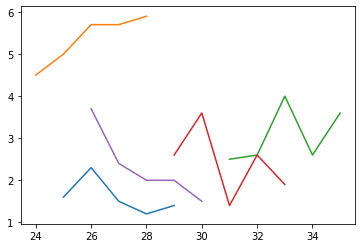

In [95]:
plt.plot(fg_age, fg_war)
plt.plot(na_age, na_war)
plt.plot(bg_age, bg_war)
plt.plot(ac_age, ac_war)
plt.plot(kp_age, kp_war)
plt.show()

In [96]:
df.iloc[[6, 8, 12, 9, 0]]

Name   WAR std
6      Manny Machado  1.790419
8        Eric Hosmer       NaN
12  Christian Yelich  2.005592
9       Mookie Betts  2.054653
0         Joey Votto  2.352531

In [98]:
# FINDINGS: Younger players seem to be less consistent
# Intuitively this makes sense, as players need to adjust the hightened competition in the league

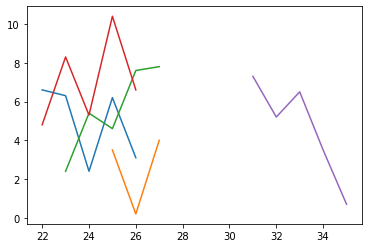

In [99]:
plt.plot(mm_age, mm_war)
plt.plot(eh_age, eh_war)
plt.plot(cy_age, cy_war)
plt.plot(mb_age, mb_war)
plt.plot(jv_age, jv_war)
plt.show()

In [100]:
# FINDINGS: There is a clear and expected trend, older players perform worse than younger players

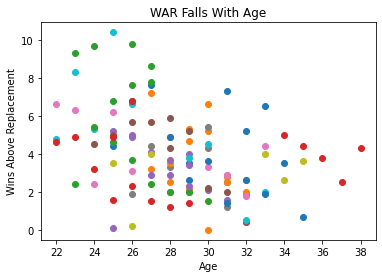

In [101]:
#https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
plt.scatter(jv_age, jv_war)
plt.scatter(pg_age, pg_war)
plt.scatter(mt_age, mt_war)
plt.scatter(nc_age, nc_war)
plt.scatter(ar_age, ar_war)
plt.scatter(na_age, na_war)
plt.scatter(mm_age, mm_war)
plt.scatter(ja_age, ja_war)
plt.scatter(eh_age, eh_war)
plt.scatter(mb_age, mb_war)
plt.scatter(tg_age, tg_war)
plt.scatter(cb_age, cb_war)
plt.scatter(cy_age, cy_war)
plt.scatter(xb_age, xb_war)
plt.scatter(aj_age, aj_war)
plt.scatter(bc_age, bc_war)
plt.scatter(cs_age, cs_war)
plt.scatter(dl_age, dl_war)
plt.scatter(bg_age, bg_war)
plt.scatter(el_age, el_war)
plt.scatter(ac_age, ac_war)
plt.scatter(kc_age, kc_war)
plt.scatter(kp_age, kp_war)
plt.scatter(fg_age, fg_war)
plt.scatter(js_age, js_war)
plt.xlabel("Age")
plt.ylabel("Wins Above Replacement")
plt.title("WAR Falls With Age")
plt.show()

In [102]:
# It looks like most of our data points sit between the ages of 24 and 32, so let's limit our x-axis

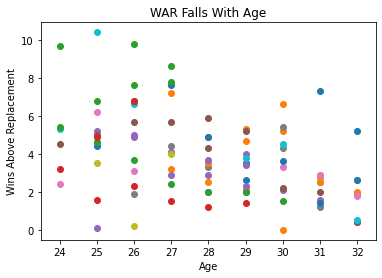

In [103]:
#https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
plt.scatter(jv_age, jv_war)
plt.scatter(pg_age, pg_war)
plt.scatter(mt_age, mt_war)
plt.scatter(nc_age, nc_war)
plt.scatter(ar_age, ar_war)
plt.scatter(na_age, na_war)
plt.scatter(mm_age, mm_war)
plt.scatter(ja_age, ja_war)
plt.scatter(eh_age, eh_war)
plt.scatter(mb_age, mb_war)
plt.scatter(tg_age, tg_war)
plt.scatter(cb_age, cb_war)
plt.scatter(cy_age, cy_war)
plt.scatter(xb_age, xb_war)
plt.scatter(aj_age, aj_war)
plt.scatter(bc_age, bc_war)
plt.scatter(cs_age, cs_war)
plt.scatter(dl_age, dl_war)
plt.scatter(bg_age, bg_war)
plt.scatter(el_age, el_war)
plt.scatter(ac_age, ac_war)
plt.scatter(kc_age, kc_war)
plt.scatter(kp_age, kp_war)
plt.scatter(fg_age, fg_war)
plt.scatter(js_age, js_war)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Wins Above Replacement")
plt.title("WAR Falls With Age")
plt.show()

In [111]:
# Starting here and in all subsequent graphs, we want to visualize three different metrics
# First is age, second is a variable series, and third is WAR
# Age will always be the x-axis, the variable will always be the y-axis, and WAR will be represented by the size of the plotted data point
# For best visualization, we raise WAR to the power of 2.5

# FINDINGS: Generally, players with average exit velocities above 90 mph perform better than others
# This is clear in younger players, but you also see a clearly higher quantity of low-performing, older players with sub-90 mph exit velocities
# It is very clear that age 31 and 32, players who hit the ball harder generally perform better

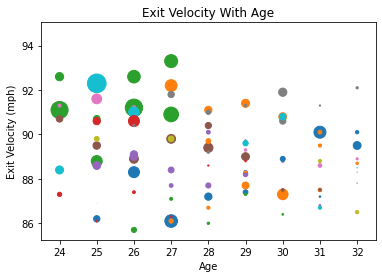

In [127]:
plt.scatter(jv_age, jv_ev, s = jv_war**2.5)
plt.scatter(pg_age, pg_ev, s = pg_war**2.5)
plt.scatter(mt_age, mt_ev, s = mt_war**2.5)
plt.scatter(nc_age, nc_ev, s = nc_war**2.5)
plt.scatter(ar_age, ar_ev, s = ar_war**2.5)
plt.scatter(na_age, na_ev, s = na_war**2.5)
plt.scatter(mm_age, mm_ev, s = mm_war**2.5)
plt.scatter(ja_age, ja_ev, s = ja_war**2.5)
plt.scatter(eh_age, eh_ev, s = eh_war**2.5)
plt.scatter(mb_age, mb_ev, s = mb_war**2.5)
plt.scatter(tg_age, tg_ev, s = tg_war**2.5)
plt.scatter(cb_age, cb_ev, s = cb_war**2.5)
plt.scatter(cy_age, cy_ev, s = cy_war**2.5)
plt.scatter(xb_age, xb_ev, s = xb_war**2.5)
plt.scatter(aj_age, aj_ev, s = aj_war**2.5)
plt.scatter(bc_age, bc_ev, s = bc_war**2.5)
plt.scatter(cs_age, cs_ev, s = cs_war**2.5)
plt.scatter(dl_age, dl_ev, s = dl_war**2.5)
plt.scatter(bg_age, bg_ev, s = bg_war**2.5)
plt.scatter(el_age, el_ev, s = el_war**2.5)
plt.scatter(ac_age, ac_ev, s = ac_war**2.5)
plt.scatter(kc_age, kc_ev, s = kc_war**2.5)
plt.scatter(kp_age, kp_ev, s = kp_war**2.5)
plt.scatter(fg_age, fg_ev, s = fg_war**2.5)
plt.scatter(js_age, js_ev, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Exit Velocity (mph)")
plt.title("Exit Velocity With Age")
plt.show()

In [113]:
# FINDINGS: Launch angle doesn't have too much of a discernable pattern related to WAR
# The is a "launch angle" revolution going on in recent years, where players are trying to lift the ball on purpose
# No one player is equal, so it makes sense that regardless of the consistency in launch angle, player value differs

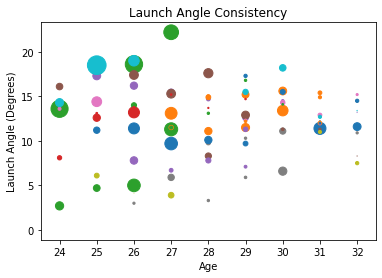

In [114]:
plt.scatter(jv_age, jv_la, s = jv_war**2.5)
plt.scatter(pg_age, pg_la, s = pg_war**2.5)
plt.scatter(mt_age, mt_la, s = mt_war**2.5)
plt.scatter(nc_age, nc_la, s = nc_war**2.5)
plt.scatter(ar_age, ar_la, s = ar_war**2.5)
plt.scatter(na_age, na_la, s = na_war**2.5)
plt.scatter(mm_age, mm_la, s = mm_war**2.5)
plt.scatter(ja_age, ja_la, s = ja_war**2.5)
plt.scatter(eh_age, eh_la, s = eh_war**2.5)
plt.scatter(mb_age, mb_la, s = mb_war**2.5)
plt.scatter(tg_age, tg_la, s = tg_war**2.5)
plt.scatter(cb_age, cb_la, s = cb_war**2.5)
plt.scatter(cy_age, cy_la, s = cy_war**2.5)
plt.scatter(xb_age, xb_la, s = xb_war**2.5)
plt.scatter(aj_age, aj_la, s = aj_war**2.5)
plt.scatter(bc_age, bc_la, s = bc_war**2.5)
plt.scatter(cs_age, cs_la, s = cs_war**2.5)
plt.scatter(dl_age, dl_la, s = dl_war**2.5)
plt.scatter(bg_age, bg_la, s = bg_war**2.5)
plt.scatter(el_age, el_la, s = el_war**2.5)
plt.scatter(ac_age, ac_la, s = ac_war**2.5)
plt.scatter(kc_age, kc_la, s = kc_war**2.5)
plt.scatter(kp_age, kp_la, s = kp_war**2.5)
plt.scatter(fg_age, fg_la, s = fg_war**2.5)
plt.scatter(js_age, js_la, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Launch Angle (Degrees)")
plt.title("Launch Angle Consistency")
plt.show()

In [115]:
# FINDINGS: Again, we see that at ages 31 and 32, it is clear that the rate at which a player has hard hits per batted ball (95+ mph)
# matters for value. It is clearly evident that younger players hit the ball hard with more consistency, and that translates to higher value.

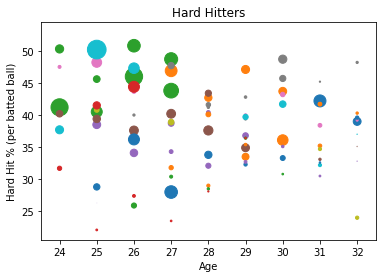

In [116]:
plt.scatter(jv_age, jv_hh, s = jv_war**2.5)
plt.scatter(pg_age, pg_hh, s = pg_war**2.5)
plt.scatter(mt_age, mt_hh, s = mt_war**2.5)
plt.scatter(nc_age, nc_hh, s = nc_war**2.5)
plt.scatter(ar_age, ar_hh, s = ar_war**2.5)
plt.scatter(na_age, na_hh, s = na_war**2.5)
plt.scatter(mm_age, mm_hh, s = mm_war**2.5)
plt.scatter(ja_age, ja_hh, s = ja_war**2.5)
plt.scatter(eh_age, eh_hh, s = eh_war**2.5)
plt.scatter(mb_age, mb_hh, s = mb_war**2.5)
plt.scatter(tg_age, tg_hh, s = tg_war**2.5)
plt.scatter(cb_age, cb_hh, s = cb_war**2.5)
plt.scatter(cy_age, cy_hh, s = cy_war**2.5)
plt.scatter(xb_age, xb_hh, s = xb_war**2.5)
plt.scatter(aj_age, aj_hh, s = aj_war**2.5)
plt.scatter(bc_age, bc_hh, s = bc_war**2.5)
plt.scatter(cs_age, cs_hh, s = cs_war**2.5)
plt.scatter(dl_age, dl_hh, s = dl_war**2.5)
plt.scatter(bg_age, bg_hh, s = bg_war**2.5)
plt.scatter(el_age, el_hh, s = el_war**2.5)
plt.scatter(ac_age, ac_hh, s = ac_war**2.5)
plt.scatter(kc_age, kc_hh, s = kc_war**2.5)
plt.scatter(kp_age, kp_hh, s = kp_war**2.5)
plt.scatter(fg_age, fg_hh, s = fg_war**2.5)
plt.scatter(js_age, js_hh, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Hard Hit % (per batted ball)")
plt.title("Hard Hitters")
plt.show()

In [117]:
# FINDINGS: This may show one of the clearest patterns. As players age, if they have the discipline to not extend outside of the strike zone, they perform better.
# It is very apparent from the age of 28 onwards

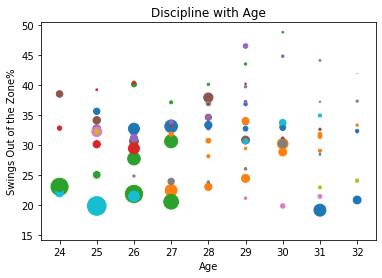

In [125]:
plt.scatter(jv_age, jv_os, s = jv_war**2.5)
plt.scatter(pg_age, pg_os, s = pg_war**2.5)
plt.scatter(mt_age, mt_os, s = mt_war**2.5)
plt.scatter(nc_age, nc_os, s = nc_war**2.5)
plt.scatter(ar_age, ar_os, s = ar_war**2.5)
plt.scatter(na_age, na_os, s = na_war**2.5)
plt.scatter(mm_age, mm_os, s = mm_war**2.5)
plt.scatter(ja_age, ja_os, s = ja_war**2.5)
plt.scatter(eh_age, eh_os, s = eh_war**2.5)
plt.scatter(mb_age, mb_os, s = mb_war**2.5)
plt.scatter(tg_age, tg_os, s = tg_war**2.5)
plt.scatter(cb_age, cb_os, s = cb_war**2.5)
plt.scatter(cy_age, cy_os, s = cy_war**2.5)
plt.scatter(xb_age, xb_os, s = xb_war**2.5)
plt.scatter(aj_age, aj_os, s = aj_war**2.5)
plt.scatter(bc_age, bc_os, s = bc_war**2.5)
plt.scatter(cs_age, cs_os, s = cs_war**2.5)
plt.scatter(dl_age, dl_os, s = dl_war**2.5)
plt.scatter(bg_age, bg_os, s = bg_war**2.5)
plt.scatter(el_age, el_os, s = el_war**2.5)
plt.scatter(ac_age, ac_os, s = ac_war**2.5)
plt.scatter(kc_age, kc_os, s = kc_war**2.5)
plt.scatter(kp_age, kp_os, s = kp_war**2.5)
plt.scatter(fg_age, fg_os, s = fg_war**2.5)
plt.scatter(js_age, js_os, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Swings Out of the Zone%")
plt.title("Discipline with Age")
plt.show()

In [118]:
# FINDINGS: As we can see, there is a general trend of making less contact on pitches in the strike zone as a player ages.
# What is really interesting, however, is that higher contact in the zone does not seem to correlate with higher performance.
# This indicates that quality of contact if more important

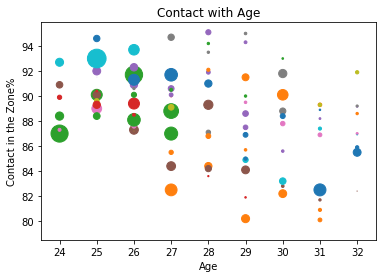

In [126]:
plt.scatter(jv_age, jv_zc, s = jv_war**2.5)
plt.scatter(pg_age, pg_zc, s = pg_war**2.5)
plt.scatter(mt_age, mt_zc, s = mt_war**2.5)
plt.scatter(nc_age, nc_zc, s = nc_war**2.5)
plt.scatter(ar_age, ar_zc, s = ar_war**2.5)
plt.scatter(na_age, na_zc, s = na_war**2.5)
plt.scatter(mm_age, mm_zc, s = mm_war**2.5)
plt.scatter(ja_age, ja_zc, s = ja_war**2.5)
plt.scatter(eh_age, eh_zc, s = eh_war**2.5)
plt.scatter(mb_age, mb_zc, s = mb_war**2.5)
plt.scatter(tg_age, tg_zc, s = tg_war**2.5)
plt.scatter(cb_age, cb_zc, s = cb_war**2.5)
plt.scatter(cy_age, cy_zc, s = cy_war**2.5)
plt.scatter(xb_age, xb_zc, s = xb_war**2.5)
plt.scatter(aj_age, aj_zc, s = aj_war**2.5)
plt.scatter(bc_age, bc_zc, s = bc_war**2.5)
plt.scatter(cs_age, cs_zc, s = cs_war**2.5)
plt.scatter(dl_age, dl_zc, s = dl_war**2.5)
plt.scatter(bg_age, bg_zc, s = bg_war**2.5)
plt.scatter(el_age, el_zc, s = el_war**2.5)
plt.scatter(ac_age, ac_zc, s = ac_war**2.5)
plt.scatter(kc_age, kc_zc, s = kc_war**2.5)
plt.scatter(kp_age, kp_zc, s = kp_war**2.5)
plt.scatter(fg_age, fg_zc, s = fg_war**2.5)
plt.scatter(js_age, js_zc, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Contact in the Zone%")
plt.title("Contact with Age")
plt.show()

In [120]:
# FINDINGS: What's interesting here is the low performance of older players that pull the ball more than younger players.
# This could indicate that older players are more aggressive to compensate for slower instincts

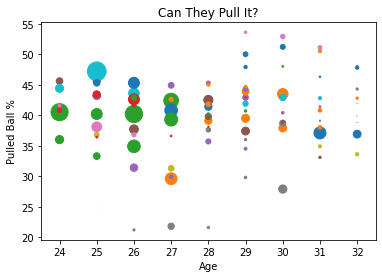

In [121]:
plt.scatter(jv_age, jv_pull, s = jv_war**2.5)
plt.scatter(pg_age, pg_pull, s = pg_war**2.5)
plt.scatter(mt_age, mt_pull, s = mt_war**2.5)
plt.scatter(nc_age, nc_pull, s = nc_war**2.5)
plt.scatter(ar_age, ar_pull, s = ar_war**2.5)
plt.scatter(na_age, na_pull, s = na_war**2.5)
plt.scatter(mm_age, mm_pull, s = mm_war**2.5)
plt.scatter(ja_age, ja_pull, s = ja_war**2.5)
plt.scatter(eh_age, eh_pull, s = eh_war**2.5)
plt.scatter(mb_age, mb_pull, s = mb_war**2.5)
plt.scatter(tg_age, tg_pull, s = tg_war**2.5)
plt.scatter(cb_age, cb_pull, s = cb_war**2.5)
plt.scatter(cy_age, cy_pull, s = cy_war**2.5)
plt.scatter(xb_age, xb_pull, s = xb_war**2.5)
plt.scatter(aj_age, aj_pull, s = aj_war**2.5)
plt.scatter(bc_age, bc_pull, s = bc_war**2.5)
plt.scatter(cs_age, cs_pull, s = cs_war**2.5)
plt.scatter(dl_age, dl_pull, s = dl_war**2.5)
plt.scatter(bg_age, bg_pull, s = bg_war**2.5)
plt.scatter(el_age, el_pull, s = el_war**2.5)
plt.scatter(ac_age, ac_pull, s = ac_war**2.5)
plt.scatter(kc_age, kc_pull, s = kc_war**2.5)
plt.scatter(kp_age, kp_pull, s = kp_war**2.5)
plt.scatter(fg_age, fg_pull, s = fg_war**2.5)
plt.scatter(js_age, js_pull, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Pulled Ball %")
plt.title("Can They Pull It?")
plt.show()

In [122]:
# FINDINGS: Higher performing players tend to consistenty hit the ball to center as they age

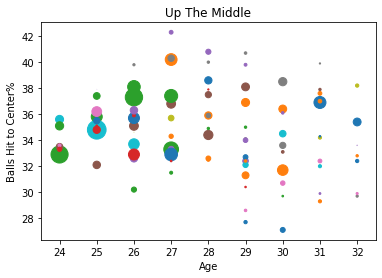

In [123]:
plt.scatter(jv_age, jv_cent, s = jv_war**2.5)
plt.scatter(pg_age, pg_cent, s = pg_war**2.5)
plt.scatter(mt_age, mt_cent, s = mt_war**2.5)
plt.scatter(nc_age, nc_cent, s = nc_war**2.5)
plt.scatter(ar_age, ar_cent, s = ar_war**2.5)
plt.scatter(na_age, na_cent, s = na_war**2.5)
plt.scatter(mm_age, mm_cent, s = mm_war**2.5)
plt.scatter(ja_age, ja_cent, s = ja_war**2.5)
plt.scatter(eh_age, eh_cent, s = eh_war**2.5)
plt.scatter(mb_age, mb_cent, s = mb_war**2.5)
plt.scatter(tg_age, tg_cent, s = tg_war**2.5)
plt.scatter(cb_age, cb_cent, s = cb_war**2.5)
plt.scatter(cy_age, cy_cent, s = cy_war**2.5)
plt.scatter(xb_age, xb_cent, s = xb_war**2.5)
plt.scatter(aj_age, aj_cent, s = aj_war**2.5)
plt.scatter(bc_age, bc_cent, s = bc_war**2.5)
plt.scatter(cs_age, cs_cent, s = cs_war**2.5)
plt.scatter(dl_age, dl_cent, s = dl_war**2.5)
plt.scatter(bg_age, bg_cent, s = bg_war**2.5)
plt.scatter(el_age, el_cent, s = el_war**2.5)
plt.scatter(ac_age, ac_cent, s = ac_war**2.5)
plt.scatter(kc_age, kc_cent, s = kc_war**2.5)
plt.scatter(kp_age, kp_cent, s = kp_war**2.5)
plt.scatter(fg_age, fg_cent, s = fg_war**2.5)
plt.scatter(js_age, js_cent, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Balls Hit to Center%")
plt.title("Up The Middle")
plt.show()

In [ ]:
# FINDINGS: Higher performing, older players seem to retreat back to hitting the ball consistenty the other way like they did when they were younger.
# This could be because players know that any sustained success with age requires them to let the game come to them, and not try to control it.

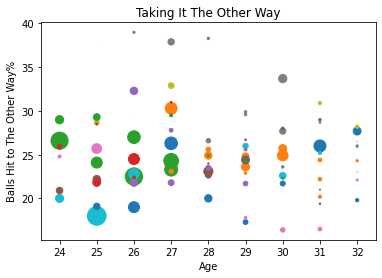

In [124]:
plt.scatter(jv_age, jv_oppo, s = jv_war**2.5)
plt.scatter(pg_age, pg_oppo, s = pg_war**2.5)
plt.scatter(mt_age, mt_oppo, s = mt_war**2.5)
plt.scatter(nc_age, nc_oppo, s = nc_war**2.5)
plt.scatter(ar_age, ar_oppo, s = ar_war**2.5)
plt.scatter(na_age, na_oppo, s = na_war**2.5)
plt.scatter(mm_age, mm_oppo, s = mm_war**2.5)
plt.scatter(ja_age, ja_oppo, s = ja_war**2.5)
plt.scatter(eh_age, eh_oppo, s = eh_war**2.5)
plt.scatter(mb_age, mb_oppo, s = mb_war**2.5)
plt.scatter(tg_age, tg_oppo, s = tg_war**2.5)
plt.scatter(cb_age, cb_oppo, s = cb_war**2.5)
plt.scatter(cy_age, cy_oppo, s = cy_war**2.5)
plt.scatter(xb_age, xb_oppo, s = xb_war**2.5)
plt.scatter(aj_age, aj_oppo, s = aj_war**2.5)
plt.scatter(bc_age, bc_oppo, s = bc_war**2.5)
plt.scatter(cs_age, cs_oppo, s = cs_war**2.5)
plt.scatter(dl_age, dl_oppo, s = dl_war**2.5)
plt.scatter(bg_age, bg_oppo, s = bg_war**2.5)
plt.scatter(el_age, el_oppo, s = el_war**2.5)
plt.scatter(ac_age, ac_oppo, s = ac_war**2.5)
plt.scatter(kc_age, kc_oppo, s = kc_war**2.5)
plt.scatter(kp_age, kp_oppo, s = kp_war**2.5)
plt.scatter(fg_age, fg_oppo, s = fg_war**2.5)
plt.scatter(js_age, js_oppo, s = js_war**2.5)
plt.xlabel("Age")
plt.xlim(23.5, 32.5)
plt.ylabel("Balls Hit to The Other Way%")
plt.title("Taking It The Other Way")
plt.show()

In [ ]:
# SUMMARY FINDINGS:
# Exit velocity, consistency in contact, and quality of contact seem to help aging players perform consistently, all things equal. They are unlikely
# to perform as they did when they were younger, but can still be serviceable or more in the major leagues.
# As players age, discipline is key. Being overly aggressive seems to reduce value, whereas being balanced and spraying the ball
# all over the field can be an advantage.
# Interestingly, launch angles seem to be generally consistent across age ranges. A slower swing for older players may play a 
# more prominent role.

# All of these findings are based on observations of patterns. A sabermetrician would need to perform a more in-depth and
# statistically significant analysis to see if what we see is true or not.




